In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [89]:
df.drop(["id","Unnamed: 32"], axis=1 , inplace=True)

In [90]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [92]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [93]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [94]:
df.diagnosis.unique()

array([1, 0])

In [95]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [96]:
# transpose etme
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [97]:
#5.adım x ve y olarak df bölünmesi, targetin x'lerden silinmesi
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [98]:
from sklearn.decomposition import PCA

#6.adım x üzerinde normalization,standartizasyon, poly expansion uygulamak
x = ((x - np.min(x))/(np.max(x)-np.min(x)))

'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=pd.DataFrame(sc.fit_transform(x))
'''
pca = PCA(n_components=3)  # Örnek olarak 3 bileşen
x_pca = pd.DataFrame(pca.fit_transform(x))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [99]:
#7.adım veri setinin train/test şeklinde split edilmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=False, test_size=0.25)

In [100]:
#8.adım ANN yapısının kurulması için kütüphanelerin import edilmesi
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
keras.utils.set_random_seed(0)

In [101]:
#9.adım giriş, ara katman ve çıkış katmanının oluşturulması
model.add(Dense(units = 16,  activation = 'relu', input_dim = len(x.columns)))
model.add(Dropout(0.1))

model.add(Dense(units = 8,  activation = 'relu' ))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [102]:
#10.adım modelin derlenmesi ve eğitilmesi
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_data=(x, y))


Epoch 1/30
14/14 [==============================] - 2s 24ms/step - loss: 0.2464 - accuracy: 0.4624 - val_loss: 0.2441 - val_accuracy: 0.4482
Epoch 2/30
14/14 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.4953 - val_loss: 0.2362 - val_accuracy: 0.5694
Epoch 3/30
14/14 [==============================] - 0s 7ms/step - loss: 0.2316 - accuracy: 0.6080 - val_loss: 0.2289 - val_accuracy: 0.6766
Epoch 4/30
14/14 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.6972 - val_loss: 0.2211 - val_accuracy: 0.7293
Epoch 5/30
14/14 [==============================] - 0s 10ms/step - loss: 0.2168 - accuracy: 0.7254 - val_loss: 0.2135 - val_accuracy: 0.7293
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 0.2078 - accuracy: 0.7676 - val_loss: 0.2037 - val_accuracy: 0.8067
Epoch 7/30
14/14 [==============================] - 0s 9ms/step - loss: 0.1999 - accuracy: 0.8075 - val_loss: 0.1943 - val_accuracy: 0.8348
Epoch 8/30
14/14 [

In [103]:
#11.adım modelin tahminlerinin elde edilmesi 0.5 ile karşılaştırılması
y_pred1 = model.predict(x_test)
y_pred = (y_pred1 > 0.5)

5/5 [==============================] - 0s 2ms/step


In [104]:
#12.adım modelin train ve test doğruluklarını çıkarın
train_score, train_acc = model.evaluate(x_train, y_train)
trest_score, test_acc = model.evaluate(x_test, y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9441
Train accuracy: 0.9507042169570923
Test accuracy: 0.9440559148788452


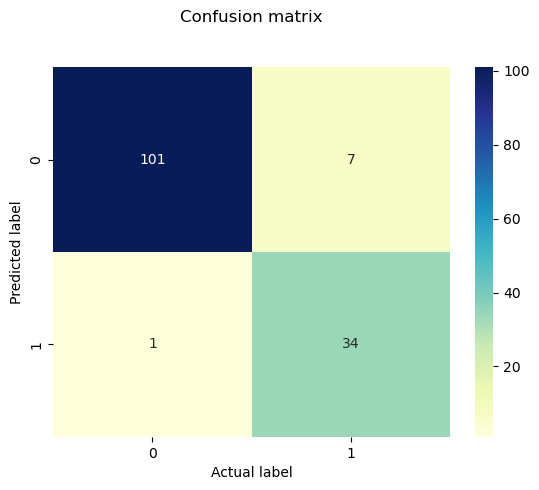

In [105]:
#13.adım confusion matrix çıkarma
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.show()
plt.close()

In [106]:
#14.adım classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       108
           1       0.83      0.97      0.89        35

    accuracy                           0.94       143
   macro avg       0.91      0.95      0.93       143
weighted avg       0.95      0.94      0.95       143



In [107]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [108]:
# Eğitim ve doğrulama doğruluk değerlerini alın
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

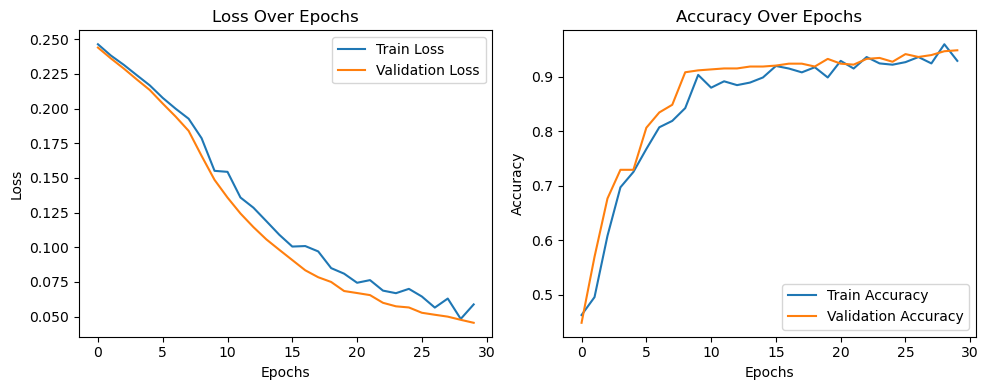

In [109]:
# Kayıp eğrilerini çizdirin
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Doğruluk eğrilerini çizdirin
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()